In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pathlib import Path

#study data files paths
mass_killing_incidents_path = Path("Resources/mass_killing_incidents_public.csv")
mass_offenders_path = Path("Resources/mass_killing_offenders_public.csv")
mass_killing_weapons_path = Path("Resources/mass_killing_weapons_public.csv")
shooting_1982_2023_path = Path("Resources/shooting_1982-2023_cleaned.csv")
violence_project_Path = Path("Resources/Violence Project Mass Shooter Database - Version 6.1.csv")

#to read csv files
mass_killing_incidents = pd.read_csv(mass_killing_incidents_path)
mass_offenders = pd.read_csv(mass_offenders_path)
mass_killing_weapons = pd.read_csv(mass_killing_weapons_path)
shooting_1982_2023 = pd.read_csv(shooting_1982_2023_path)
mass_shooter_df = pd.read_csv(violence_project_Path, skiprows=1)

#combining data to form dataframe
# mass_killing_df = pd.merge(mass_offenders, mass_killing_incidents, how="outer", on=["incident_id", "incident_id"])

df = mass_shooter_df

In [19]:
# create a list of column names to drop

df = df.drop(columns=["Shooter Last Name", "Shooter First Name", "Day of Week", "Day", "Number Killed", "Number Injured",
               "Month", "Year", "Street Number", "Height", "Weight", "Domestic Abuse Specified", "Street Name", "County", "Zip Code", "State Code", 
                "Region", "Metro/Micro Statistical Area Type", "Location", "Insider or Outsider", "Military Branch", 
                "Kidnapping or Hostage Situation", "Community Involvement", "Community Involvement Specified", "Known to Police or FBI",
                "Workplace Shooting", "Multiple Locations", "Other Location", "Armed Person on Scene", "School Performance", "School Performance Specified",
                "Specify Armed Person", "Part I Crimes", "Part II Crimes", "Highest Level of Justice System Involvement", 
               "Childhood SES", "Mother Violent Treatment", "Parental Substance Abuse", "History of Animal Abuse", "Parent Criminal Record", "Younger Siblings",
                "Family Member Incarcerated", "Adult Trauma", "Recent or Ongoing Stressor", "Birth Order", "Number of Siblings",
               "Signs of Crisis Expanded", "Inability to Perform Daily Tasks", "Notably Depressed Mood", "Older Siblings",
                "Unusually Calm or Happy", "Rapid Mood Swings", "Increased Agitation", "Abusive Behavior", "Children",
                "Isolation", "Losing Touch with Reality", "Prior Hospitalization", "Voluntary or Involuntary Hospitalization", 
                "Prior Counseling", "Voluntary or Mandatory Counseling", "Psychiatric Medication", "Family Member Victim",
                "Psychiatric Medication Specified", "Medication Category", "Treatment 6 Months Prior to Shooting",
               "FASD (Fetal Alcohol Spectrum Disorder)", "Known Family Mental Health History", "Autism Spectrum",
                "Substance Use", "Health Issues", "Health Issues - Specify", "Head Injury / Possible TBI", 
                "Motive: Racism/Xenophobia", "Interest in Past Mass Violence", "Relationship with Other Shooting(s)", 
                "Motive: Religious Hate", "Motive: Misogyny", "Romantic Partner Victim",
                "Motive: Homophobia", "Motive: Employment Issue", "Motive: Economic Issue",
                "Motive: Legal Issue", "Motive: Relationship Issue", "Leakage How", 
                "Motive: Fame-Seeking", "Motive: Unknown", "Role of Psychosis in the Shooting"])

df = df.iloc[:, :-16]

df = df.copy() # create a copy of df with the desired columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,Case #,Full Date,City,State,Latitude,Longitude,Urban/Suburban/Rural,Age,Gender,Race,Immigrant,Sexual Orientation,Religion,Education,Relationship Status,Employment Status,Employment Type,Military Service,Criminal Record,History of Physical Altercations,History of Domestic Abuse,History of Sexual Offenses,Gang Affiliation,Terror Group Affiliation,Known Hate Group or Chat Room Affiliation,Violent Video Games,Bully,Bullied,Raised by Single Parent,Parental Divorce / Separation,Parental Death in Childhood,Parental Suicide,Childhood Trauma,Physically Abused,Sexually Abused,Emotionally Abused,Neglected,Signs of Being in Crisis,Timeline of Signs of Crisis,Paranoia,Suicidality,Mental Illness,Known Prejudices,Motive: Interpersonal Conflict,Motive: Other,Social Media Use,Leakage,Leakage Who,Leakage Specific/Nonspecific
0,1,8/1/1966,Austin,TX,30.286058,-97.739350,0,25.0,0.0,0,0.0,0.0,1.0,2.0,2.0,0,NaN,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,2.0,1,0,0.0,0.0,2.0,1.0,0,1
1,2,11/12/1966,Mesa,AZ,33.459937,-111.781900,0,18.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,2,"2, 4",0.0,0.0,2.0,0.0,NaN,NaN
2,3,10/23/1967,Lock Haven,PA,41.125184,-77.451878,2,39.0,0.0,0,0.0,0.0,1.0,2.0,2.0,1,2.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,4,0,1.0,0.0,2.0,0.0,NaN,NaN
3,4,3/16/1968,Ironwood,MI,46.535978,-90.156262,2,56.0,0.0,0,0.0,0.0,NaN,NaN,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0,0,0.0,0.0,2.0,0.0,NaN,NaN
4,5,4/5/1969,Harrisburg,PA,40.103677,-75.755056,0,31.0,0.0,1,0.0,0.0,1.0,2.0,2.0,0,2.0,1.0,0,0.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2,1,0.0,1.0,2.0,0.0,NaN,NaN
5,6,9/23/1970,Albany,NY,42.614852,-73.970812,0,25.0,0.0,1,0.0,0.0,NaN,4.0,0.0,1,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2.0,0,2,0.0,0.0,2.0,0.0,NaN,NaN
6,7,5/29/1972,Raleigh,NC,35.837199,-78.642979,0,22.0,0.0,1,0.0,0.0,NaN,1.0,2.0,1,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,1,0.0,0.0,2.0,0.0,NaN,NaN
7,8,6/21/1972,Cherry Hill,NJ,39.927991,-74.994341,1,33.0,0.0,0,0.0,0.0,1.0,2.0,NaN,1,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2.0,0,0,0.0,0.0,2.0,0.0,NaN,NaN
8,9,1/7/1973,New Orleans,LA,30.002426,-90.038906,0,23.0,0.0,1,0.0,0.0,1.0,2.0,0.0,0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0,4,"1, 4",0.0,0.0,2.0,1.0,"9, 1","1, 0"
9,10,3/2/1975,Smith River,CA,41.949285,-124.199492,2,21.0,0.0,0,0.0,0.0,NaN,NaN,0.0,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,4,0,0.0,0.0,2.0,0.0,NaN,NaN


In [20]:
# create a new column 'Age_Group' based on the 'Age' column
df['Age_Group'] = pd.cut(df['Age'], bins=[12, 17, 29, 39, 49, 59, 69, float('inf')], 
                         labels=['12-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+'])

# print the new column 'Age_Group'
age_groups = df['Age_Group']

print(age_groups)


0      18-29
1      18-29
2      30-39
3      50-59
4      30-39
5      18-29
6      18-29
7      30-39
8      18-29
9      18-29
10     30-39
11     30-39
12     18-29
13     18-29
14     40-49
15     18-29
16     40-49
17     18-29
18     18-29
19       70+
20     30-39
21     40-49
22     50-59
23     40-49
24     30-39
25     18-29
26     18-29
27     30-39
28     40-49
29     30-39
30     30-39
31     40-49
32     60-69
33     30-39
34     18-29
35     40-49
36     18-29
37     40-49
38     40-49
39     30-39
40     30-39
41     18-29
42     40-49
43     30-39
44     18-29
45     18-29
46     50-59
47     40-49
48     50-59
49     18-29
50     18-29
51     30-39
52     30-39
53     18-29
54     18-29
55     18-29
56     18-29
57     40-49
58     18-29
59     40-49
60     30-39
61     60-69
62     40-49
63     50-59
64     40-49
65     30-39
66       NaN
67     12-17
68     12-17
69     18-29
70     12-17
71     18-29
72     18-29
73     40-49
74     40-49
75     40-49
76     30-39

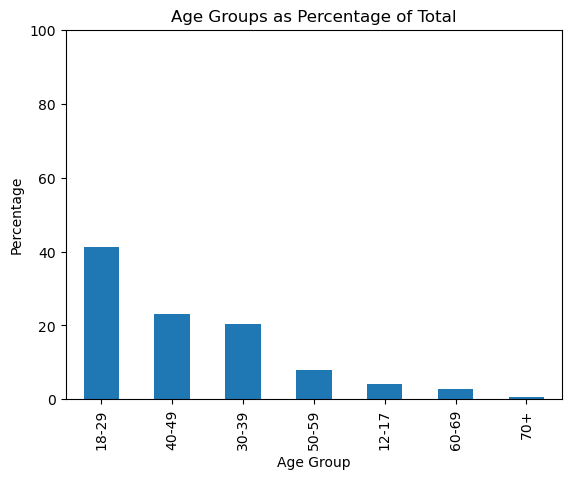

In [21]:
# create a bar chart showing age groups as percentage of total
age_groups = df['Age_Group'].value_counts(normalize=True) * 100
age_groups.plot(kind='bar')

# set the y-axis limit to 100
plt.ylim([0, 100])

# add chart title and axis labels
plt.title('Age Groups as Percentage of Total')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

# display the chart
plt.show()

In [22]:
df = df.replace(r'^\s*$', 'unknown', regex=True)


# Gender
# create a dictionary to map "Gender" column numerical codes to string values 
code_map = {0: "male", 1: "female"}

# replace numerical codes with their corresponding string values in a column
df["Gender"] = df["Gender"].replace(code_map)
df


# Urban/Suburban/Rural
# create a dictionary to map "Urban/Suburban/Rural" column numerical codes to string values
code_map = {0: "Urban", 1: "Suburban", 2: "Rural"}

df["Urban/Suburban/Rural"] = df["Urban/Suburban/Rural"].replace(code_map)
df

# Immigrant
# create a dictionary to map "Immigrant" column numerical codes to string values
code_map = {0: "No", 1: "Yes"}

df["Immigrant"] = df["Immigrant"].replace(code_map)
df

# Sexual Orientation
# create a dictionary to map "Sexual Orientation" column numerical codes to string values
code_map = {0: "Heterosexual", 1: "Not Heterosexual"}

df["Sexual Orientation"] = df["Sexual Orientation"].replace(code_map)
df


# Religion
# create a dictionary to map "Religion" column numerical codes to string values
code_map = {0: "None", 1: "Christian", 2: "Muslim", 3: "Buddhist", 4: "Cultural", 5: "Jewish"}

df["Religion"] = df["Religion"].replace(code_map)
df


# Race
# create a dictionary to map "Race" column numerical codes to string values

# Convert non-integers to NaN
df["Race"] = pd.to_numeric(df["Race"], errors="coerce")

# Remove rows with non-integer values
df = df.dropna(subset=["Race"])

# Convert remaining values to integers
df["Race"] = df["Race"].astype(int)

code_map = {0: "White", 1: "Black", 2: "Latinx", 3: "Asian", 4: "Middle Eastern", 5: "Native American", "Moroccan": "Moroccan", "Bosnian": "Bosnian"}

df["Race"] = df["Race"].replace(code_map)
df


# Education
# create a dictionary to map "Education" column numerical codes to string values
code_map = {0: "Less than high school", 1: "High school/GED", 2: "Some college/trade school", 
            3: "Bachelor's degree", 4: "Graduate school/advanced degree"}

df["Education"] = df["Education"].replace(code_map)
df


# Relationship Status
# create a dictionary to map "Relationship Status" column numerical codes to string values
code_map = {0: "Single", 1: "Boyfriend/girlfriend", 2: "Married", 
            3: "Divorced/separated/widowed"}

df["Relationship Status"] = df["Relationship Status"].replace(code_map)
df



# Employment Status
# Replace NaN values with "Unknown" string
# df["Employment Status"] = df["Employment Status"].fillna("Unknown")

# # remove leading/trailing whitespace from values in "Employment Status" column
# df["Employment Status"] = df["Employment Status"].str.strip()

# Convert non-integers to NaN
df["Employment Status"] = pd.to_numeric(df["Employment Status"], errors="coerce")

# Remove rows with non-integer values
df = df.dropna(subset=["Employment Status"])

# Convert remaining values to integers
df["Employment Status"] = df["Employment Status"].astype(int)

# create a dictionary to map "Immigrant" column numerical codes to string values
code_map = {0: "Not Working", 1: "Working", "Unknown": "Unknown", "unknown": "unknown"}

df["Employment Status"] = df["Employment Status"].replace(code_map)
df



# # Employment Type
# # create a dictionary to map "Employment Type" column numerical codes to string values
# code_map = {0: "Blue collar", 1: "White collar ", 2: "In between"}

# df["Employment Type"] = df["Employment Type"].replace(code_map)
# df


# Military Service
# create a dictionary to map "Employment Type" column numerical codes to string values
code_map = {0: "No", 1: "Yes ", 2: "Joined but did not make it"}

df["Military Service"] = df["Military Service"].replace(code_map)
df











,Case #,Full Date,City,State,Latitude,Longitude,Urban/Suburban/Rural,Age,Gender,Race,Immigrant,Sexual Orientation,Religion,Education,Relationship Status,Employment Status,Employment Type,Military Service,Criminal Record,History of Physical Altercations,History of Domestic Abuse,History of Sexual Offenses,Gang Affiliation,Terror Group Affiliation,Known Hate Group or Chat Room Affiliation,Violent Video Games,Bully,Bullied,Raised by Single Parent,Parental Divorce / Separation,Parental Death in Childhood,Parental Suicide,Childhood Trauma,Physically Abused,Sexually Abused,Emotionally Abused,Neglected,Signs of Being in Crisis,Timeline of Signs of Crisis,Paranoia,Suicidality,Mental Illness,Known Prejudices,Motive: Interpersonal Conflict,Motive: Other,Social Media Use,Leakage,Leakage Who,Leakage Specific/Nonspecific,Age_Group
0,1,8/1/1966,Austin,TX,30.286058,-97.739350,Urban,25.0,male,White,No,Heterosexual,Christian,Some college/trade school,Married,Not Working,NaN,Yes,1,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,2.0,1,0,0.0,0.0,2.0,1.0,0,1,18-29
1,2,11/12/1966,Mesa,AZ,33.459937,-111.781900,Urban,18.0,male,White,No,Heterosexual,None,Less than high school,Single,Not Working,NaN,No,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,2,"2, 4",0.0,0.0,2.0,0.0,NaN,NaN,18-29
2,3,10/23/1967,Lock Haven,PA,41.125184,-77.451878,Rural,39.0,male,White,No,Heterosexual,Christian,Some college/trade school,Married,Working,2.0,Yes,0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,4,0,1.0,0.0,2.0,0.0,NaN,NaN,30-39
3,4,3/16/1968,Ironwood,MI,46.535978,-90.156262,Rural,56.0,male,White,No,Heterosexual,NaN,NaN,Single,Working,0.0,No,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0,0,0.0,0.0,2.0,0.0,NaN,NaN,50-59
4,5,4/5/1969,Harrisburg,PA,40.103677,-75.755056,Urban,31.0,male,Black,No,Heterosexual,Christian,Some college/trade school,Married,Not Working,2.0,Yes,0,0.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2,1,0.0,1.0,2.0,0.0,NaN,NaN,30-39
5,6,9/23/1970,Albany,NY,42.614852,-73.970812,Urban,25.0,male,Black,No,Heterosexual,NaN,Graduate school/advanced degree,Single,Working,1.0,No,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2.0,0,2,0.0,0.0,2.0,0.0,NaN,NaN,18-29
6,7,5/29/1972,Raleigh,NC,35.837199,-78.642979,Urban,22.0,male,Black,No,Heterosexual,NaN,High school/GED,Married,Working,0.0,No,1,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,1,0.0,0.0,2.0,0.0,NaN,NaN,18-29
7,8,6/21/1972,Cherry Hill,NJ,39.927991,-74.994341,Suburban,33.0,male,White,No,Heterosexual,Christian,Some college/trade school,NaN,Working,0.0,Yes,1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2.0,0,0,0.0,0.0,2.0,0.0,NaN,NaN,30-39
8,9,1/7/1973,New Orleans,LA,30.002426,-90.038906,Urban,23.0,male,Black,No,Heterosexual,Christian,Some college/trade school,Single,Not Working,0.0,Yes,1,1.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0,4,"1, 4",0.0,0.0,2.0,1.0,"9, 1","1, 0",18-29
9,10,3/2/1975,Smith River,CA,41.949285,-124.199492,Rural,21.0,male,White,No,Heterosexual,NaN,NaN,Single,Not Working,0.0,No,1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,4,0,0.0,0.0,2.0,0.0,NaN,NaN,18-29


In [23]:
#print(df["Gender"].unique())

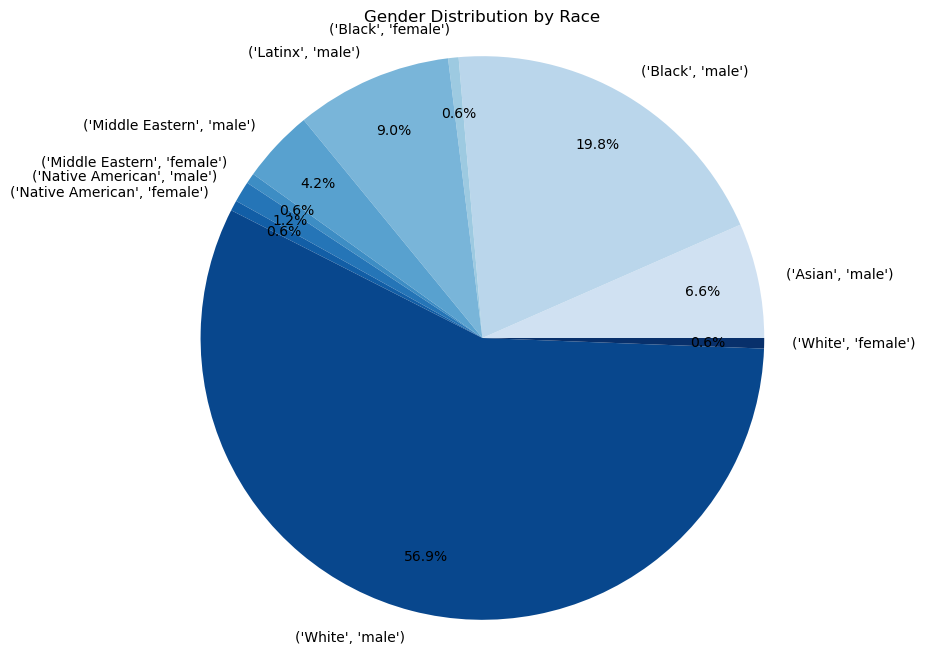

In [24]:
# Group the total number of values in "Gender" based on "Race"
grouped_data = df.groupby('Race')['Gender'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 8))

# Define the colors in gradients of blue
colors = plt.cm.Blues(np.linspace(0.2, 1, len(grouped_data)))

# Create a pie chart
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', pctdistance=0.8, colors=colors)

# Set the aspect ratio to be equal to display a perfect circle
plt.axis('equal')

# Add a title
plt.title('Gender Distribution by Race')

# Display the chart
plt.show()

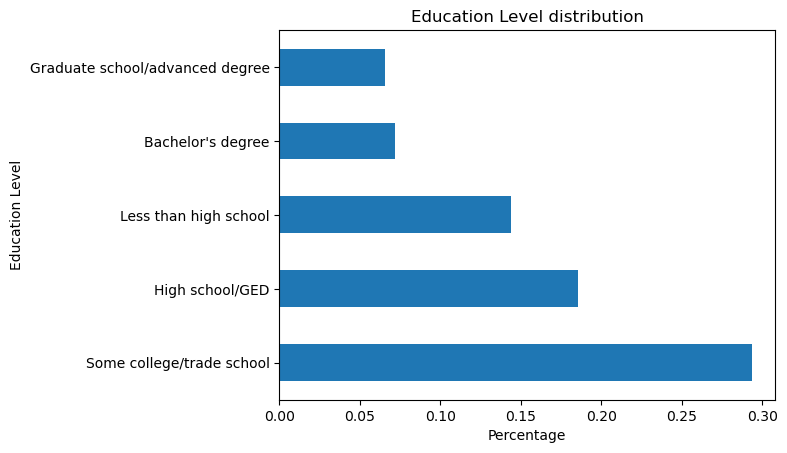

In [25]:
# Count the number of occurrences of each age group
age_counts = df['Education'].value_counts()

# Divide by the total number of rows to get the percentage
age_percentages = age_counts / len(df)

# Create a horizontal bar chart
ax = age_percentages.plot(kind='barh')
ax.set_xlabel('Percentage')
ax.set_ylabel('Education Level')

# Add a title to the chart
ax.set_title('Education Level distribution')
plt.show()

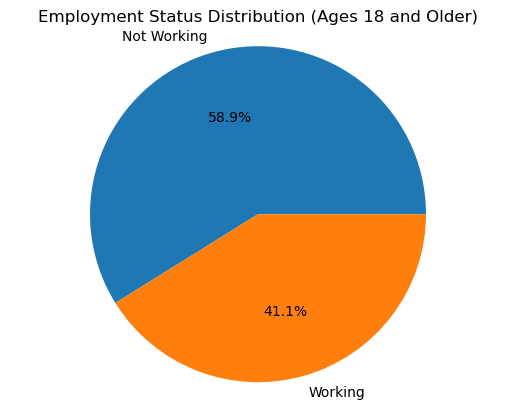

In [29]:

# Filter out the rows with Age Group less than 18
filtered_df = df[df['Age'] >= 18]

# Group by Employment Status and calculate the count of each value
grouped_df = filtered_df['Employment Status'].value_counts()

# Calculate the percentage of each employment status
employment_percentages = grouped_df / len(filtered_df) * 100

# Create a pie chart
plt.pie(employment_percentages, labels=employment_percentages.index, autopct='%1.1f%%')

# Set the aspect ratio to be equal to display a perfect circle
plt.axis('equal')

# Add a title
plt.title('Employment Status Distribution (Ages 18 and Older)')

# Display the chart
plt.show()
